<a href="https://colab.research.google.com/github/shabrina19/Analisis-Sentimen-Belajar-Daring-menggunakan-Optimasi-Naive-Bayes-Classifier-dengan-Adaboost/blob/main/Sentiment_Analysis_Belajar_Daring_Online_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Import Library**


In [ ]:
!pip install numpy
!pip install pandas
!pip install matplotlib
!pip install tensorflow
!pip install sklearn
!pip install tweet-preprocessor
import re
import string
import preprocessor as p

from nltk.stem import WordNetLemmatizer
import nltk
import nltk
nltk.download('punkt')
nltk.download('wordnet')
# Import fundamentals
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import re
import pickle
import statistics
import sys
import matplotlib
import sklearn

# Import nltk and download punkt, wordnet
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer, PorterStemmer 


# Import the TextBlob
from textblob import TextBlob
from textblob import Blobber

# Sklearn
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score
import sklearn as sk
from sklearn.model_selection import KFold
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier


# Import wordcloud
from wordcloud import WordCloud

# I will keep the resulting plots
%matplotlib inline

# Enable Jupyter Notebook's intellisense
%config IPCompleter.greedy=True

# We want to see whole content (non-truncated)
pd.set_option('display.max_colwidth', None)


from sklearn.model_selection import train_test_split
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import learning_curve
from sklearn.model_selection import validation_curve

from sklearn.pipeline import Pipeline

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from sklearn import metrics
from sklearn.metrics import plot_confusion_matrix

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

#Basic imports
from tqdm import tqdm
import time

#General Sklearn imports
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score, GridSearchCV, RandomizedSearchCV

#Hyperopt imports
import hyperopt as hp
from hyperopt import fmin, tpe, Trials, hp, STATUS_OK, space_eval
from hyperopt.pyll.base import scope

#Classification imports
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier



[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, StandardScaler
from sklearn.feature_extraction.text import TfidfVectorizer
! pip install scikit_optimize
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import confusion_matrix

from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestClassifier


import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
!pip install jcopml
from jcopml.pipeline import num_pipe, cat_pipe
from jcopml.tuning import grid_search_params as gsp, random_search_params as rsp
from jcopml.feature_importance import mean_score_decrease, mean_loss_decrease
from jcopml.plot import plot_missing_value, plot_confusion_matrix, plot_correlation_matrix
from jcopml.tuning.space import Integer, Real
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import fbeta_score, make_scorer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB

     |████████████████████████████████| 101 kB 4.4 MB/s 
  Created wheel for jcopml: filename=jcopml-1.1.10-py2.py3-none-any.whl size=33230 sha256=4ba524b7461c901628c7bde54506d4cdc88d35c89dc1f355af4021015b42d1fa
  Stored in directory: /root/.cache/pip/wheels/1e/b0/7a/2e3db99fcf3707a61b80c5193e1155acc8eaf730c510424c6b
Successfully built jcopml


In [ ]:
# Load the Tweets
tweets_raw = pd.read_excel("/content/drive/MyDrive/A data colab/stgh awl hsllabelno_net_all.xlsx")

# Print Tweets 
display(tweets_raw.head(5))
print(tweets_raw.describe())

# Print Information
print(tweets_raw.info())

,Processed
0,teachers regions struggle half death application challenge
1,actually benchmark achievement maximum reach well students entitle get not optimal well depend lecturers students creative collaboration lecturers plus smart students can certainly achieve maximum result
2,yes return respective villages difficult signal not participate lectures this ciwi
3,risma prepare blc elementary junior students difficult facilities
4,teacher explain stupid especially not explain


                                                                                                                                        Processed
count                                                                                                                                       24716
unique                                                                                                                                      24716
top     get circular another semester i  not imagine one semester lot assignments but can common good i hope everything right soon can hunt cogan
freq                                                                                                                                            1
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24716 entries, 0 to 24715
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Processed  24716 non-null  object
dtypes: object(1)
memory usage: 193.2+ KB
Non

**Preprocessing Tweets**

In [ ]:
def preprocess_tweet_text(tweet):

    # Translate from Bahasa Indonesia to English
    # blob= TextBlob(tweet)
    # tweet= blob.translate(from_lang='id',to='en')  #(to='en') 
    
    # Tweet preprocessor. Erase hashtag, link, etc
    tweet=p.clean(str(tweet))

    # Lower case
    tweet = tweet.lower()
    
    # Remove Number
    tweet = re.sub(r"\d+", "", tweet)

    # Tokenizing
    tweet_tokens = word_tokenize(str(tweet)) 

    # Replacing Words
    filtered_words = [w for w in tweet_tokens] 
    filtered_words = [w.replace("n't", " not") for w in filtered_words]
    filtered_words = [w.replace("difficulty", " difficult") for w in filtered_words]  

    # Remove Punctuation
    filtered_words = [w.translate(str.maketrans(string.punctuation, ' '*len(string.punctuation))) for w in filtered_words] #map punctuation to space
    
    # Lemmatization
    wordnet_lemmatizer = WordNetLemmatizer()
    s = [wordnet_lemmatizer.lemmatize(w,pos="a") for w in filtered_words]
    lemma_words = [wordnet_lemmatizer.lemmatize(w,pos="v") for w in s]

    # Remove Stopwords
    stpw = ["yep","progo","pris","hyungkihyuk ",'i','I','Im','im',"i'm","I'm", 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about','between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'only', 'own', 'than', 'will', 'just', 'should', "should've","lecture","teach","student","aaaaakkk","much",'arek', 'many','very high', "high","thank", 'ksdjdjsk',"dick", "kintilll",'kejam', 'shittttmennn', 'beritasatu','zyuzyur','matkul','nihao', 'now', 'd', 'll', 'm', 'o', 've', 'y','re', "i've",'online', 'learning', 'new', 'normal','sch','gt','learn',"xiexie",'abeess', 'abege', 'abehdia', 'abel', 'abell', 'aben', 'abepura', 'abg', 'abhi', 'abhijit', 'abhinaya','abis', 'abisaka', 'abisss', 'abissss', 'abistu','abiz', 'abizzz', 'abjeng', 'abjiiinggggg','aaa', 'aaaa', 'aaaaa', 'aaaaaa', 'aaaaaaa', 'aaaaaaaaa', 'aaaaaaaaaa', 'aaaaaaaaaaaa', 'aaaaaaaaaaaaaa', 'aaaaaaaaaaaaaaaaaa', 'aaaaaaaaahhhhhhhh', 'aaaaaaak', 'aaaaaaakkkkk', 'aaaaaah', 'aaaaaakkkkkk', 'aaaaaargh', 'aaaaah', 'aaaah', 'aaaak', 'aaah', 'aaahhh', 'aaahsjs', 'aaakhskshskhajsksjskahakjhskjs', 'aaarggghh', 'aaargh', 'aab', 'aadc', 'aaddmaths', 'aadna', 'aaenge', 'aah', 'aahahahaha', 'aahh', 'aahhh', 'aahhhh', 'aaia', 'aaina', 'aaj', 'aakakaka', 'aakar', 'aake', 'aakmbo', 'aam', 'aamiin', 'aamiinaamiinaamiinpangestune', 'aamiinn', 'aamiinnlahu', 'aamiinnnnn', 'aamiinnpoko', 'aamingara', 'aaminnnew', 'aamjmc', 'aammhh', 'aanananananananana', 'aaniyo', 'aap', 'aapka', 'aapke', 'aapko', 'aaqq', 'aargh', 'aarghh', 'aarghhhh', 'aaron', 'aarrggghh', 'aate', 'aati', 'aawww', 'aaya', 'aaye', 'aayga', 'abang', 'abangojol', 'abantu', 'abanye', 'abas', 'abcdedosen', 'abcdef','abdini','abdilla','abdomen', 'abduh', 'abdul', 'abdulbar', 'abdullah', 'abdulrahman', 'abdurrahman','abeba', 'abeden', 'study','go','learn','school','still','work','kulon','class','time','people','college','so','use','take','era','home','also','come','though','first','ca','one','too','already','say','start','tomorrow','finish','day','give','late','ask','anj', 'anjaaay', 'anjai', 'anjaini', 'anjampamp', 'anjampb', 'anjangsana', 'anjani', 'anjas', 'anjay', 'anjayafter', 'anjayani', 'anjayy', 'anjayyy', 'anjc', 'anjcape', 'anjeng', 'anjengg', 'anjengggg', 'anjengggjeng', 'anjenkkk', 'anjer', 'anjeradatu', 'anjerr', 'anjerrr', 'anjerrrr', 'anjg', 'anjgg', 'anjgggg', 'anji', 'anjigue', 'anjiir', 'anjiirr', 'anjiirrr', 'anjiirrrrrrr', 'anjim', 'anjimasi', 'anjimgua', 'anjimlah', 'anjimm', 'anjimmm', 'anjimmmm', 'anjimmmmmm', 'anjip', 'anjir', 'anjirfix', 'anjirr', 'anjirrini', 'anjirrr', 'anjirrrr', 'anjirt', 'anjirtt', 'anjirttt', 'anjirttttttttttttttttt', 'anjis', 'anjit', 'anjitanjitanjitanjit', 'anjj', 'anjjj', 'anjjjj', 'anjjrittt', 'anjm', 'anjnk', 'anjr', 'anjri', 'anjrip', 'anjrit', 'anjritt', 'anjrittt', 'anjrittttt', 'anjrjt', 'anjrod', 'anjrot', 'anjrotie', 'anjrott', 'anjrottnangiss', 'anjrottt', 'anjrotttsksjksksksj', 'anjrr', 'anjrrrr', 'anjrt', 'anjtrit', 'anju', 'anjuran', 'anjuu', 'anjy', 'anmakantidoes', 'annyeong','ansjyim','anyeng', 'anyengg', 'anyeong','anyiiiiink', 'anying', 'anyingg', 'anyink', 'anyirr','anzrit','aovogopay','aoyama','apalagi', 'apanii', 'apansi','apasdsmpsma', 'apasii','apatrivia', 'apatu','apdet', 'apdetan','apesii','apfh','aah', 'bismillah', 'bismillahdone', 'bismillahhirahmannirahim', 'bismillahhirrahmanirrahim', 'bismillahhirrohmanirrohim', 'bismillahi', 'bismillahirahmanirahim', 'bismillahirahmanirrahim', 'bismillahirohmanirohim', 'bismillahirohmanirrohim', 'bismillahirohmannirrohinsha', 'bismillahirrahmanirrahiim', 'bismillahirrahmanirrahim', 'bismillahirrahmanirrahimhalo', 'bismillahirrahmanirrahimngleruri', 'bismillahirrohmanirrohim', 'bissmillahirrohmanirrohimm', 'bjb', 'bjingzut', 'bjink', 'bjinkkkk', 'bjir', 'bjirr', 'bjk', 'bjm', 'bjp', ' bk ', 'bkaku', 'bkd', 'bkevinjacobhaknyeon', 'bkgn','study','learn','school','kulon','class','college',' ca ', 'wkwkwk', 'sch','aaaaaaaah','ab', 'abah','zuzur', 'ahahaha','ah', 'ahh', 'ahhh','aiptu','aja', 'ak','alaikum','alhamdulillah','assalamu', 'assalamualaikum','astu', 'asu','ba', 'babinsa','bb','bdr','bdg','bem', 'ben','bhabinkamtibmas','bljr','bm', 'bnr', 'bo','bpp','bsi', 'bts','bucin','cahayu','cb', 'cc', 'cg', 'cie', 'cikgu', 'ckp','classmeet', 'cmiiw', 'cont', 'dadi', 'deh', 'dewe', 'dh','cp', 'dec', 'dh', 'digbk', 'dino', 'diy','dk', 'dki', 'dl', 'dm', 'doc', 'doi','dong','doyoung', 'dp', 'dpn', 'dpr', 'dprd', 'dr', 'drakor','drakor','eg', 'eh', 'ehehe', 'ehh', 'ehhh', 'either', 'eits', 'el', 'etan', 'euy', 'fak','feb', 'ff', 'fi', 'fk','fm','ftf','fyi','gabut', 'gb', 'gc', 'gcr', 'ge','gpa', 'gpp', 'gr', 'grgr','gunungkidul', 'gus','ha','hahahah','hahahahahah','hai', 'hbs','heh', 'hehe', 'heheh', 'hehehe','hhh', 'hhhh','hihi', 'hikd', 'hiks', 'hiksrot','hm', 'hmm', 'hmmm', 'ho', 'hoshi','hp', 'hr', 'hsk', 'hu', 'huft', 'huh', 'huhu', 'huhuhu', 'huhuu', 'hw', 'hyung', 'idai','idr', 'ig', 'ih', 'ii', 'iii', 'iki', 'iku','iv','jaehyun','jamet', 'jan', 'jarai', 'jbjb','jek', 'jen', 'jeonghan', 'jl', 'jo', 'ka', 'kang', 'kating', 'kb', 'kbm', 'kbs', 'ke', 'kec', 'kel','kh','ki','kidul','kl', 'km', 'kmrn', 'ko', 'kot', 'koyo', 'kp', 'ku', 'kuch', 'kui','kw', 'la', 'laa','lah', 'latsol','ldr','le','lek','lg', 'lo','lor','ltmpt','ma','mah', 'maneh', 'masyaallah', 'mayan', 'mb', 'mba','mbok','mcm', 'mdr', 'meh', 'mein', 'mh','mimin','mipi', 'ml', 'mls', 'mm', 'mmc', 'mmf', 'mo', 'msmes', 'mtk','muk', 'mulu','na','nana', 'nang', 'nd', 'nder', 'nderr', 'ne', 'nek', 'neng','ng', 'ni', 'ning', 'nitip', 'odl', 'oh', 'ohh', 'om', 'omah','ono', 'onok', 'opo','ops','pa','pape','parno', 'pdhl', 'pfmyfr', 'pgn', 'pkp', 'pkpb', 'pm', 'pmk', 'po', 'podo', 'pol', 'pp', 'pranowo', 'ptm', 'punten', 'qur', 'ra', 'rd','rek', 'rg', 'ri', 'rl', 'rm', 'ro','rp','sa', 'saiki','samsek', 'sangu','se','sek','sem','seng','sg', 'sh', 'si', 'sik', 'sk', 'sksksk', 'smes','smstr', 'smt','sqw', 'ss', 'st', 'svt', 'swt', 'syg','ta', 'tb', 'tbh', 'tbtb', 'teh', 'teros', 'th', 'tha', 'thai', 'tiber','tka', 'tl',  'tp', 'tps', 'trs', 'tt', 'tw', 'tweet', 'twt', 'udan', 'ugh', 'ugm', 'uh', 'um','uniol','ustadz', 'ut', 'uwu', 'wa', 'wae', 'wb', 'weh', 'wi', 'wib', 'wis', 'wita', 'wkw', 'wkwk', 'wkwkkw', 'wkwkw', 'wkwkwkw', 'wkwkwkwk', 'wkwkwkwkwk', 'wml', 'wo', 'woah', 'woi', 'wong', 'woozi', 'woy', 'wr','ws','wts', 'xd', 'xi', 'xixi', 'xixixi', 'ya', 'yaa', 'ye', 'yea', 'yeah', 'yh', 'yo', 'yok','zakat', 'zuzur',"ae","abah","wq"," ll"," s"," m",'little'," ve","i've"," re","awwwwwwwww"]
    stp=[w for w in lemma_words if w not in stpw]

    # Remove Words has Less than 1 and More than 22 Characters
    ll = [w for w in stp if len(w) > 1 and len(w) < 22]
    
    # Join Words
    g= " ".join(ll)
    return g

tweets_raw["Processed"]=tweets_raw["Processed"].str.lower().apply(preprocess_tweet_text)

# tweets_raw["Processed"]=tweets_raw["Comment"].str.lower().apply(preprocess_tweet_text)
# display(tweets_raw[["Processed"]].head(10))
# tweets_raw[["Processed"]].to_excel("/content/drive/MyDrive/A data colab/pos86.xlsx")

# Print Tweets 
display(tweets_raw.head(10))

# Print Information 
print(tweets_raw.info())

,Processed
0,teachers regions struggle half death application challenge
1,actually benchmark achievement maximum reach well students entitle get not optimal well depend lecturers students creative collaboration lecturers plus smart students can certainly achieve maximum result
2,yes return respective villages difficult signal not participate ciwi
3,risma prepare blc elementary junior students difficult facilities
4,teacher explain stupid especially not explain
5,not ready monday lazy bat
6,okay properly no need protest no can explain etc old stupid like teacher complain not good never want try aka play around mall
7,enthusiastic even fate quota unclear
8,covid pandemic university organize god humans force life maintain health strengthen faith build solidarity offline importantly see god uncertainties life rev sutomo
9,facilitate free quota children not afford can maximally government must ready provider


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24716 entries, 0 to 24715
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Processed  24716 non-null  object
dtypes: object(1)
memory usage: 193.2+ KB
None


In [ ]:
# Drop Duplicated Rows
tweets_raw.drop_duplicates(keep='first', inplace=True)

# Drop Empty Rows
tweets_raw['Processed'].replace('', np.nan, inplace=True)
tweets_raw.dropna(subset=['Processed'], inplace=True)

# Print Information
print(tweets_raw.info())

# Print Tweets 
display(tweets_raw.head(10))

# Convert to XLSX
# tweets_raw[["Processed"]].to_excel("/content/drive/MyDrive/A data colab/87sntmncl.xlsx")

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24653 entries, 0 to 24715
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Processed  24653 non-null  object
dtypes: object(1)
memory usage: 385.2+ KB
None


,Processed
0,teachers regions struggle half death application challenge
1,actually benchmark achievement maximum reach well students entitle get not optimal well depend lecturers students creative collaboration lecturers plus smart students can certainly achieve maximum result
2,yes return respective villages difficult signal not participate ciwi
3,risma prepare blc elementary junior students difficult facilities
4,teacher explain stupid especially not explain
5,not ready monday lazy bat
6,okay properly no need protest no can explain etc old stupid like teacher complain not good never want try aka play around mall
7,enthusiastic even fate quota unclear
8,covid pandemic university organize god humans force life maintain health strengthen faith build solidarity offline importantly see god uncertainties life rev sutomo
9,facilitate free quota children not afford can maximally government must ready provider


**Labeling Tweets**

In [ ]:
# Labeling
from textblob import TextBlob

# Add polarities and subjectivities into the DataFrame by using TextBlob
tweets_raw["Polarity"] = tweets_raw["Processed"].apply(lambda word: TextBlob(word).sentiment.polarity)
tweets_raw["Subjectivity"] = tweets_raw["Processed"].apply(lambda word: TextBlob(word).sentiment.subjectivity)

# Display the Polarity and Subjectivity columns
display(tweets_raw[["Polarity","Subjectivity","Processed"]].head(9))
tweets_raw.drop(tweets_raw[tweets_raw['Polarity'] == 0.000000	].index, inplace = True)

,Polarity,Subjectivity,Processed
0,-0.166667,0.166667,teachers regions struggle half death application challenge
1,0.232143,0.578571,actually benchmark achievement maximum reach well students entitle get not optimal well depend lecturers students creative collaboration lecturers plus smart students can certainly achieve maximum result
2,-0.250000,0.550000,yes return respective villages difficult signal not participate ciwi
3,-0.100000,0.950000,risma prepare blc elementary junior students difficult facilities
4,-0.400000,1.000000,teacher explain stupid especially not explain
5,-0.175000,0.750000,not ready monday lazy bat
6,-0.110000,0.480000,okay properly no need protest no can explain etc old stupid like teacher complain not good never want try aka play around mall
7,0.600000,0.900000,enthusiastic even fate quota unclear
8,0.400000,1.000000,covid pandemic university organize god humans force life maintain health strengthen faith build solidarity offline importantly see god uncertainties life rev sutomo


In [ ]:
# Define a function to classify polarities
def analyse_polarity(polarity):
    if polarity > 0:
        return "Positif"
    if polarity == 0:
        return "Netral"
    if polarity < 0:
        return "Negatif"

# Apply the funtion on Polarity column and add the results into a new column
tweets_raw["Label"] = tweets_raw["Polarity"].apply(analyse_polarity)

# Display the Polarity and Subjectivity Analysis
display(tweets_raw[["Label","Processed"]].tail(9))

# Convert to XLSX
# tweets_raw.to_excel("/content/drive/MyDrive/A data colab/lbll.xlsx")

,Label,Processed
24707,Positif,like not offline not active teacher not know students actually copy friend assignment result report card drop value please let corona let let not ruin everything
24708,Positif,please corona virus quickly yes offline public get teacher not diligent anymore
24709,Positif,since corona no rank shame teacher
24710,Negatif,depok city education office disdik cancel face face trial plan schedule january due fluctuate rate spread corona virus covid depok city enter zone oxjkbz
24711,Negatif,maybe happen corona weird doctor wear uniform maybe change clothe not right
24712,Positif,corona away fast pls offline
24713,Negatif,cry get ulcer wow stupid really ashamed funnel friend not want umrah corona everything way not worry confuse whether sad happy
24714,Negatif,teacher schoolchildren google listen hear score good value report card corona become rank reference can see quality not proud teachers teacher google
24715,Positif,wish hope can offline corona no hope can successful amen want minhee slogan wish luck giveaway wish good health


In [ ]:
# Print the value counts of the Label column
print(tweets_raw["Label"].value_counts())

Positif    15593
Negatif     8864
Name: Label, dtype: int64


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


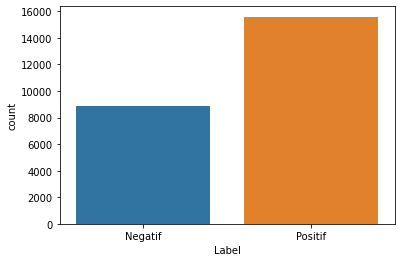

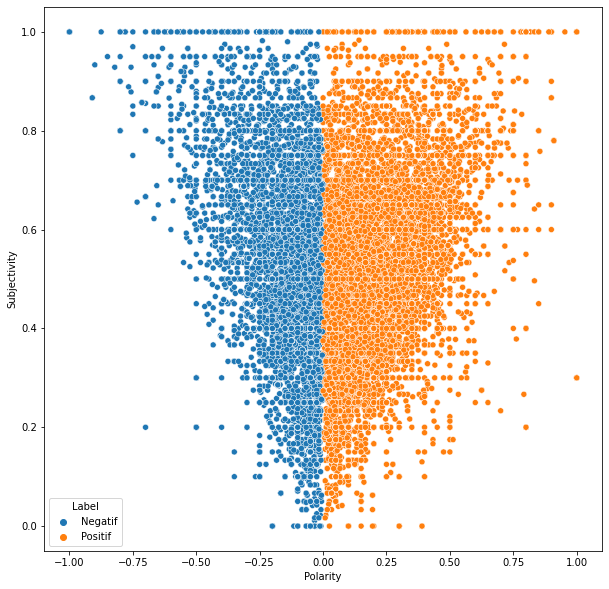

In [ ]:
# Visualizations of Labeled Tweets

# Change the datatype as "category"
tweets_raw["Label"] = tweets_raw["Label"].astype("category")

# Visualize the Label counts
sns.countplot(tweets_raw["Label"])
# plt.title("Jumlah Label")
plt.show()


# Visualize the Polarity scores
plt.figure(figsize = (10, 10)) 
sns.scatterplot(x="Polarity", y="Subjectivity", hue="Label", data=tweets_raw)
# plt.title("Subjectivity vs Polarity")
plt.show()

In [ ]:
# Convert Label to Number
# 0= Negatif, 1=Netral, 2=Positif

# Encode the labels
le = LabelEncoder()
tweets_raw["Label_angka"] = le.fit_transform(tweets_raw["Label"])

# Display the encoded labels
display(tweets_raw[["Label_angka","Label"]].head(6))
# tweets_raw["Label_angka"].to_csv('/content/drive/MyDrive/A data colab/HslLabel.csv')

,Label_angka,Label
0,0,Negatif
1,1,Positif
2,0,Negatif
3,0,Negatif
4,0,Negatif
5,0,Negatif


In [ ]:
# Display the positive tweets
display(tweets_raw.sort_values(by=["Polarity", "Processed"], axis=0, ascending=False)[["Polarity", "Processed"]].head(5))
# Display the negative tweets
display(tweets_raw.sort_values(by=["Polarity", "Processed"], axis=0, ascending=[True, False])[["Polarity", "Processed"]].head(5))

,Polarity,Processed
1666,1.0,yes monday very happy meet dada children
8761,1.0,yes best stay not know pass
19362,1.0,would think would outbreak like corona virus rest assure problems solutions best solutions education
16593,1.0,want indosat perfect mas
22871,1.0,want buy house hurry want want money buy best house like


,Polarity,Processed
24520,-1.0,video nasty case police hunt account hackers
2335,-1.0,since appetite drop drastically not excite very stupid like please guy like
2235,-1.0,since appetite drop drastically not excite very stupid like please
742,-1.0,result nadim policy children policy turn miserable can afford buy children not afford buy cellphones children
16948,-1.0,really bleak exam choose program test no enter brain


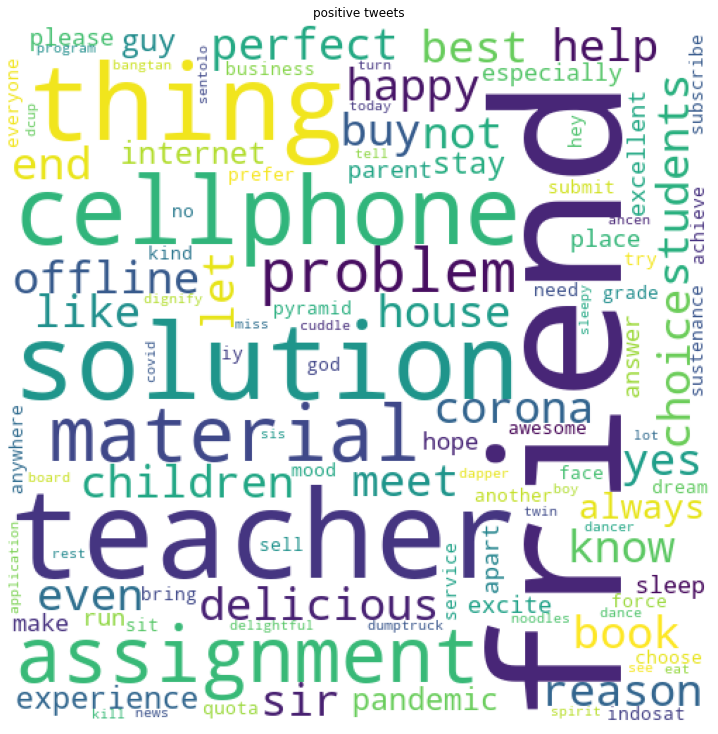

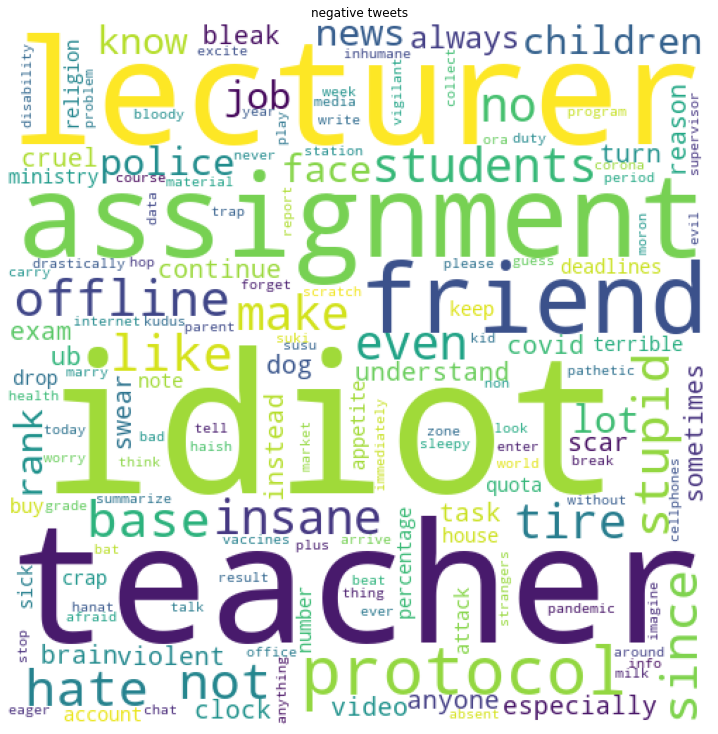

In [ ]:
# Make Word Cloud

def make_wordcloud(data, label):
  tfidf_stops=["get","very","can","sksksksks","ipiiiilll","guwahhhh","offff","hateiiiiii","aaaaakkk","sksdjdjsk","want","really","oseng","mumet","kelas","kulon","nangis","sksksksksk","mas","nder","kuliah","dick", "kintilll","nyambi","skdjskdj","jonghyun","ma"]
  # Initialize a Tf-idf Vectorizer "lecturer","lecture","teach","teacher","student",
  polarity_vectorizer = TfidfVectorizer(max_features=1000, stop_words=tfidf_stops)

  # Fit and transform the vectorizer
  tfidf_matrix_polarity = polarity_vectorizer.fit_transform(data["Processed"])

  # Create a new DataFrame called frequencies
  frequencies_polarity = pd.DataFrame(tfidf_matrix_polarity.sum(axis=0).T,index=polarity_vectorizer.get_feature_names(),columns=['total frequency'])
  
  # Sort the words by frequency
  frequencies_polarity.sort_values(by='total frequency',ascending=False, inplace=True)

  # Join the indexes
  frequent_words_polarity = " ".join(frequencies_polarity.index)+" "
  
  # Initialize the word cloud
  wc = WordCloud(width = 500, height = 500, min_font_size = 10, max_words=500, background_color ='white', stopwords= tfidf_stops)

  # Generate the world clouds for each type of label
  tweets_polarity = wc.generate(frequent_words_polarity)

  # Plot the world cloud                     
  plt.figure(figsize = (10, 10), facecolor = None) 
  plt.imshow(tweets_polarity) 
  plt.axis("off") 
  plt.title(label +" tweets")
  plt.tight_layout(pad = 0) 
  plt.show() 

# Create DataFrames for each label
positive_popular_df = tweets_raw.sort_values(by=["Polarity"], axis=0, ascending=[False])[["Polarity","Processed"]].head(100)
negative_popular_df = tweets_raw.sort_values(by=["Polarity"], axis=0, ascending=[True])[["Polarity","Processed"]].head(100)

# Call the function
make_wordcloud(positive_popular_df, "positive")
make_wordcloud(negative_popular_df, "negative")

**Build Model**

In [ ]:
# Encode the labels
le = LabelEncoder()
tweets_raw["Label_angka"] = le.fit_transform(tweets_raw["Label"])

# Display the encoded labels
display(tweets_raw[["Label_angka"]].head())

,Label_angka
0,0
1,1
2,0
3,0
4,0


In [ ]:
# Initialize Stopwords
spw = ["yep","progo","pris","hyungkihyuk ",'i','I','Im','im',"i'm","I'm", 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about','between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'only', 'own', 'than', 'will', 'just', 'should', "should've","lecture","teach","student","aaaaakkk","much",'arek', 'many','very high', "high","thank", 'ksdjdjsk',"dick", "kintilll",'kejam', 'shittttmennn', 'beritasatu','zyuzyur','matkul','nihao', 'now', 'd', 'll', 'm', 'o', 've', 'y','re', "i've",'online', 'learning', 'new', 'normal','sch','gt','learn',"xiexie",'abeess', 'abege', 'abehdia', 'abel', 'abell', 'aben', 'abepura', 'abg', 'abhi', 'abhijit', 'abhinaya','abis', 'abisaka', 'abisss', 'abissss', 'abistu','abiz', 'abizzz', 'abjeng', 'abjiiinggggg','aaa', 'aaaa', 'aaaaa', 'aaaaaa', 'aaaaaaa', 'aaaaaaaaa', 'aaaaaaaaaa', 'aaaaaaaaaaaa', 'aaaaaaaaaaaaaa', 'aaaaaaaaaaaaaaaaaa', 'aaaaaaaaahhhhhhhh', 'aaaaaaak', 'aaaaaaakkkkk', 'aaaaaah', 'aaaaaakkkkkk', 'aaaaaargh', 'aaaaah', 'aaaah', 'aaaak', 'aaah', 'aaahhh', 'aaahsjs', 'aaakhskshskhajsksjskahakjhskjs', 'aaarggghh', 'aaargh', 'aab', 'aadc', 'aaddmaths', 'aadna', 'aaenge', 'aah', 'aahahahaha', 'aahh', 'aahhh', 'aahhhh', 'aaia', 'aaina', 'aaj', 'aakakaka', 'aakar', 'aake', 'aakmbo', 'aam', 'aamiin', 'aamiinaamiinaamiinpangestune', 'aamiinn', 'aamiinnlahu', 'aamiinnnnn', 'aamiinnpoko', 'aamingara', 'aaminnnew', 'aamjmc', 'aammhh', 'aanananananananana', 'aaniyo', 'aap', 'aapka', 'aapke', 'aapko', 'aaqq', 'aargh', 'aarghh', 'aarghhhh', 'aaron', 'aarrggghh', 'aate', 'aati', 'aawww', 'aaya', 'aaye', 'aayga', 'abang', 'abangojol', 'abantu', 'abanye', 'abas', 'abcdedosen', 'abcdef','abdini','abdilla','abdomen', 'abduh', 'abdul', 'abdulbar', 'abdullah', 'abdulrahman', 'abdurrahman','abeba', 'abeden', 'study','go','learn','school','still','work','kulon','class','time','people','college','so','use','take','era','home','also','come','though','first','ca','one','too','already','say','start','tomorrow','finish','day','give','late','ask','anj', 'anjaaay', 'anjai', 'anjaini', 'anjampamp', 'anjampb', 'anjangsana', 'anjani', 'anjas', 'anjay', 'anjayafter', 'anjayani', 'anjayy', 'anjayyy', 'anjc', 'anjcape', 'anjeng', 'anjengg', 'anjengggg', 'anjengggjeng', 'anjenkkk', 'anjer', 'anjeradatu', 'anjerr', 'anjerrr', 'anjerrrr', 'anjg', 'anjgg', 'anjgggg', 'anji', 'anjigue', 'anjiir', 'anjiirr', 'anjiirrr', 'anjiirrrrrrr', 'anjim', 'anjimasi', 'anjimgua', 'anjimlah', 'anjimm', 'anjimmm', 'anjimmmm', 'anjimmmmmm', 'anjip', 'anjir', 'anjirfix', 'anjirr', 'anjirrini', 'anjirrr', 'anjirrrr', 'anjirt', 'anjirtt', 'anjirttt', 'anjirttttttttttttttttt', 'anjis', 'anjit', 'anjitanjitanjitanjit', 'anjj', 'anjjj', 'anjjjj', 'anjjrittt', 'anjm', 'anjnk', 'anjr', 'anjri', 'anjrip', 'anjrit', 'anjritt', 'anjrittt', 'anjrittttt', 'anjrjt', 'anjrod', 'anjrot', 'anjrotie', 'anjrott', 'anjrottnangiss', 'anjrottt', 'anjrotttsksjksksksj', 'anjrr', 'anjrrrr', 'anjrt', 'anjtrit', 'anju', 'anjuran', 'anjuu', 'anjy', 'anmakantidoes', 'annyeong','ansjyim','anyeng', 'anyengg', 'anyeong','anyiiiiink', 'anying', 'anyingg', 'anyink', 'anyirr','anzrit','aovogopay','aoyama','apalagi', 'apanii', 'apansi','apasdsmpsma', 'apasii','apatrivia', 'apatu','apdet', 'apdetan','apesii','apfh','aah', 'bismillah', 'bismillahdone', 'bismillahhirahmannirahim', 'bismillahhirrahmanirrahim', 'bismillahhirrohmanirrohim', 'bismillahi', 'bismillahirahmanirahim', 'bismillahirahmanirrahim', 'bismillahirohmanirohim', 'bismillahirohmanirrohim', 'bismillahirohmannirrohinsha', 'bismillahirrahmanirrahiim', 'bismillahirrahmanirrahim', 'bismillahirrahmanirrahimhalo', 'bismillahirrahmanirrahimngleruri', 'bismillahirrohmanirrohim',"aaaaaaaa","aa","yyy","za", 'bissmillahirrohmanirrohimm', 'bjb', 'bjingzut', 'bjink', 'bjinkkkk', 'bjir', 'bjirr', 'bjk', 'bjm', 'bjp', ' bk ', 'bkaku', 'bkd', 'bkevinjacobhaknyeon', 'bkgn','study','learn','school','kulon','class','college',' ca ', 'wkwkwk', 'sch','aaaaaaaah','ab', 'abah','zuzur', 'ahahaha','ah', 'ahh', 'ahhh','aiptu','aja', 'ak','alaikum','alhamdulillah','assalamu', 'assalamualaikum','astu', 'asu','ba', 'babinsa','bb','bdr','bdg','bem', 'ben','bhabinkamtibmas','bljr','bm', 'bnr', 'bo','bpp','bsi', 'bts','bucin','cahayu','cb', 'cc', 'cg', 'cie', 'cikgu', 'ckp','classmeet', 'cmiiw', 'cont', 'dadi', 'deh', 'dewe', 'dh','cp', 'dec', 'dh', 'digbk', 'dino', 'diy','dk', 'dki', 'dl', 'dm', 'doc', 'doi','dong','doyoung', 'dp', 'dpn', 'dpr', 'dprd', 'dr', 'drakor','drakor','eg', 'eh', 'ehehe', 'ehh', 'ehhh', 'either', 'eits', 'el', 'etan', 'euy', 'fak','feb', 'ff', 'fi', 'fk','fm','ftf','fyi','gabut', 'gb', 'gc', 'gcr', 'ge','gpa', 'gpp', 'gr', 'grgr','gunungkidul', 'gus','ha','hahahah','hahahahahah','hai', 'hbs','heh', 'hehe', 'heheh', 'hehehe','hhh', 'hhhh','hihi', 'hikd', 'hiks', 'hiksrot','hm', 'hmm', 'hmmm', 'ho', 'hoshi','hp', 'hr', 'hsk', 'hu', 'huft', 'huh', 'huhu', 'huhuhu', 'huhuu', 'hw', 'hyung', 'idai','idr', 'ig', 'ih', 'ii', 'iii', 'iki', 'iku','iv','jaehyun','jamet', 'jan', 'jarai', 'jbjb','jek', 'jen', 'jeonghan', 'jl', 'jo', 'ka', 'kang', 'kating', 'kb', 'kbm', 'kbs', 'ke', 'kec', 'kel','kh','ki','kidul','kl', 'km', 'kmrn', 'ko', 'kot', 'koyo', 'kp', 'ku', 'kuch', 'kui','kw', 'la', 'laa','lah', 'latsol','ldr','le','lek','lg', 'lo','lor','ltmpt','ma','mah', 'maneh', 'masyaallah', 'mayan', 'mb', 'mba','mbok','mcm', 'mdr', 'meh', 'mein', 'mh','mimin','mipi', 'ml', 'mls', 'mm', 'mmc', 'mmf', 'mo', 'msmes', 'mtk','muk', 'mulu','na','nana', 'nang', 'nd', 'nder', 'nderr', 'ne', 'nek', 'neng','ng', 'ni', 'ning', 'nitip', 'odl', 'oh', 'ohh', 'om', 'omah','ono', 'onok', 'opo','ops','pa','pape','parno', 'pdhl', 'pfmyfr', 'pgn', 'pkp', 'pkpb', 'pm', 'pmk', 'po', 'podo', 'pol', 'pp', 'pranowo', 'ptm', 'punten', 'qur', 'ra', 'rd','rek', 'rg', 'ri', 'rl', 'rm', 'ro','rp','sa', 'saiki','samsek', 'sangu','se','sek','sem','seng','sg', 'sh', 'si', 'sik', 'sk', 'sksksk', 'smes','smstr', 'smt','sqw', 'ss', 'st', 'svt', 'swt', 'syg','ta', 'tb', 'tbh', 'tbtb', 'teh', 'teros', 'th', 'tha', 'thai', 'tiber','tka', 'tl',  'tp', 'tps', 'trs', 'tt', 'tw', 'tweet', 'twt', 'udan', 'ugh', 'ugm', 'uh', 'um','uniol','ustadz', 'ut', 'uwu', 'wa', 'wae', 'wb', 'weh', 'wi', 'wib', 'wis', 'wita', 'wkw', 'wkwk', 'wkwkkw', 'wkwkw', 'wkwkwkw', 'wkwkwkwk', 'wkwkwkwkwk', 'wml', 'wo', 'woah', 'woi', 'wong', 'woozi', 'woy', 'wr','ws','wts', 'xd', 'xi', 'xixi', 'xixixi', 'ya', 'yaa', 'ye', 'yea', 'yeah', 'yh', 'yo', 'yok','zakat', 'zuzur',"ae","abah","wq"," ll"," s"," m",'little'," ve","i've"," re","awwwwwwwww"]

# Initialize a Tf-idf Vectorizer
vectorizer = TfidfVectorizer(stop_words=spw, min_df=3)

# Fit and transform the vectorizer
tfidf_matrix = vectorizer.fit_transform(tweets_raw["Processed"])

# Let's see what we have
display(tfidf_matrix)

# Create a DataFrame for tf-idf vectors and display the first rows
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns= vectorizer.get_feature_names())
display(tfidf_df)

# tfidf_df.to_excel("/content/drive/MyDrive/A data colab/adewd.xlsx")

/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['bk', 'hyungkihyuk', 'very'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


<24457x5717 sparse matrix of type '<class 'numpy.float64'>'
	with 270420 stored elements in Compressed Sparse Row format>

,abandon,abbreviation,abilities,ability,able,ablution,abolish,abroad,abs,absence,absences,absent,absenteeism,absolutely,absorb,absurd,abt,abundant,abuse,ac,academic,academics,academy,acc,accelerate,acceleration,accept,acceptance,access,accessible,accident,accidentally,accommodate,accompany,accomplish,accord,accordance,account,accreditation,accumulation,...,yaw,yawn,yayat,yb,year,years,yedam,yee,yeh,yell,yellow,yeonjun,yes,yesss,yesterday,yet,yia,yin,yoga,yogya,yogyakarta,yoo,yoon,yoongi,yoshi,young,youth,youtube,youtuber,yuli,yup,yustisi,zen,zenius,zero,zinc,zombie,zone,zonk,zoom
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.247248,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24452,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
24453,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
24454,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
24455,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# Initialize variable
X = tweets_raw['Processed']
y = tweets_raw["Label_angka"] 

# Split Data
X_train, X_test, y_train, y_test = train_test_split(tweets_raw['Processed'], tweets_raw["Label_angka"], 
                                                    test_size=0.2, stratify=tweets_raw["Label_angka"], random_state=42)
# Print Shape
X_train.shape, X_test.shape

((19565,), (4892,))

In [ ]:
# First fit the vectorizer with our training set
tfidf_train= vectorizer.fit_transform(X_train)

# Now we can fit our test data with the same vectorizer
tfidf_test = vectorizer.transform(X_test)

# Initialize the Naive Bayes Classifier
nb = MultinomialNB()
# print(tfidf_train.shape, y_train.shape)

# Cross Validation
vl=cross_val_score(nb, tfidf_train, y_train, cv=10)
print(vl)
print((vl).mean())

# Fit the model
nb.fit(tfidf_train, y_train)
# print(tfidf_train.shape, y_train.shape)

# Save vector
# vec_file = 'vector.pickle'
# pickle.dump(vectorizer, open(vec_file, 'wb'))

# Save model
mod = '3nb.model'
pickle.dump(nb, open(mod, 'wb'))

[0.777721   0.8037813  0.77669903 0.78845171 0.78334185 0.77147239
 0.7898773  0.7898773  0.78732106 0.78783231]
0.7856375258236126


**Model Evaluation Naive Bayes**

In [ ]:
# Predict the labels
y_pred = nb.predict(tfidf_test)
print("Predicted Value NB:",y_pred)

# Print the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix\n")
print(cm)

# Print the Classification Report
cr = classification_report(y_test, y_pred)
print("\n\nClassification Report\n")
print(cr)
# print(set(y_test) - set(y_pred))

Predicted Value NB: [1 1 1 ... 1 1 1]
Confusion Matrix

[[ 884  889]
 [  86 3033]]


Classification Report

              precision    recall  f1-score   support

           0       0.91      0.50      0.64      1773
           1       0.77      0.97      0.86      3119

    accuracy                           0.80      4892
   macro avg       0.84      0.74      0.75      4892
weighted avg       0.82      0.80      0.78      4892



**Naive Bayes + Adaboost**

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

# Initialize adaboost classifier
ab = AdaBoostClassifier(base_estimator=nb)

# Cross Validation
al=cross_val_score(ab, tfidf_train, y_train, cv=10)
print(al.mean())
print(al)

# Fit the model
ab.fit(tfidf_train, y_train)
# print(tfidf_train.shape, y_train.shape)

# Save model
mod_file = '3ab.model'
pickle.dump(ab, open(mod_file, 'wb'))

0.6376181720905396
[0.63771078 0.63822177 0.63771078 0.63771078 0.6371998  0.63752556
 0.63701431 0.63752556 0.63752556 0.63803681]


**Model Evaluation**

In [ ]:
# Predict the labels
# tfidf_test = vectorizer.transform(X_test)
y_pred = ab.predict(tfidf_test)
print("Predicted Value NB + AB:",y_pred)

# Print the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix\n")
print(cm)

# Print the Classification Report
cr = classification_report(y_test, y_pred)
print("\n\nClassification Report\n")
print(cr)
# print(set(y_test) - set(y_pred))
# metrics.f1_score(y_test, y_pred, average='weighted', labels=np.unique(y_pred))

Predicted Value NB + AB: [1 1 1 ... 1 1 1]
Confusion Matrix

[[   0 1773]
 [   1 3118]]


Classification Report

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1773
           1       0.64      1.00      0.78      3119

    accuracy                           0.64      4892
   macro avg       0.32      0.50      0.39      4892
weighted avg       0.41      0.64      0.50      4892



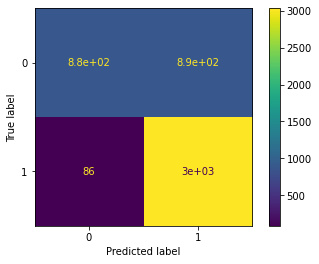

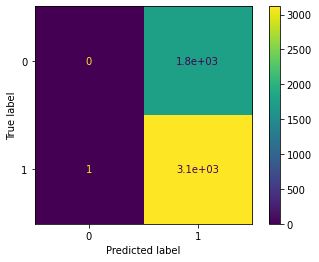

In [ ]:
# Confusion Matrix
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(nb,  tfidf_test, y_test) 

plot_confusion_matrix(ab, tfidf_test, y_test)  
 

plt.show()

**Implementing Model to New tweets**

In [ ]:
# Preprocessing and Translate Tweets

def prepro(tweet):
    # Translate from Bahasa Indonesia to English
    blob= TextBlob(tweet)
    tweet= blob.translate(from_lang='id',to='en')  #(to='en') 
    
    # Tweet preprocessor. Erase hashtag, link, etc
    tweet=p.clean(str(tweet))

    # Lower case
    tweet = tweet.lower()
    
    # Remove Number
    tweet = re.sub(r"\d+", "", tweet)

    # Tokenizing
    tweet_tokens = word_tokenize(str(tweet)) 
    filtered_words = [w for w in tweet_tokens] 
    
    # Replacing Words
    filtered_words = [w.replace("n't", " not") for w in filtered_words]
    filtered_words = [w.replace("difficulty", " difficult") for w in filtered_words]  

    # Remove Punctuation
    filtered_words = [w.translate(str.maketrans(string.punctuation, ' '*len(string.punctuation))) for w in filtered_words] #map punctuation to space
    # filtered_words = [w for w in filtered_words]
    
    # Lemmatization
    wordnet_lemmatizer = WordNetLemmatizer()
    s = [wordnet_lemmatizer.lemmatize(w,pos="a") for w in filtered_words]
    lemma_words = [wordnet_lemmatizer.lemmatize(w,pos="v") for w in s]

    # Remove Stopwords
    stpw = ["yep","progo","pris","hyungkihyuk ",'i','I','Im','im',"i'm","I'm", 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about','between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'only', 'own', 'than', 'will', 'just', 'should', "should've","lecture","teach","student","aaaaakkk","much",'arek', 'many','very high', "high","thank", 'ksdjdjsk',"dick", "kintilll",'kejam', 'shittttmennn', 'beritasatu','zyuzyur','matkul','nihao', 'now', 'd', 'll', 'm', 'o', 've', 'y','re', "i've",'online', 'learning', 'new', 'normal','sch','gt','learn',"xiexie",'abeess', 'abege', 'abehdia', 'abel', 'abell', 'aben', 'abepura', 'abg', 'abhi', 'abhijit', 'abhinaya','abis', 'abisaka', 'abisss', 'abissss', 'abistu','abiz', 'abizzz', 'abjeng', 'abjiiinggggg','aaa', 'aaaa', 'aaaaa', 'aaaaaa', 'aaaaaaa', 'aaaaaaaaa', 'aaaaaaaaaa', 'aaaaaaaaaaaa', 'aaaaaaaaaaaaaa', 'aaaaaaaaaaaaaaaaaa', 'aaaaaaaaahhhhhhhh', 'aaaaaaak', 'aaaaaaakkkkk', 'aaaaaah', 'aaaaaakkkkkk', 'aaaaaargh', 'aaaaah', 'aaaah', 'aaaak', 'aaah', 'aaahhh', 'aaahsjs', 'aaakhskshskhajsksjskahakjhskjs', 'aaarggghh', 'aaargh', 'aab', 'aadc', 'aaddmaths', 'aadna', 'aaenge', 'aah', 'aahahahaha', 'aahh', 'aahhh', 'aahhhh', 'aaia', 'aaina', 'aaj', 'aakakaka', 'aakar', 'aake', 'aakmbo', 'aam', 'aamiin', 'aamiinaamiinaamiinpangestune', 'aamiinn', 'aamiinnlahu', 'aamiinnnnn', 'aamiinnpoko', 'aamingara', 'aaminnnew', 'aamjmc', 'aammhh', 'aanananananananana', 'aaniyo', 'aap', 'aapka', 'aapke', 'aapko', 'aaqq', 'aargh', 'aarghh', 'aarghhhh', 'aaron', 'aarrggghh', 'aate', 'aati', 'aawww', 'aaya', 'aaye', 'aayga', 'abang', 'abangojol', 'abantu', 'abanye', 'abas', 'abcdedosen', 'abcdef','abdini','abdilla','abdomen', 'abduh', 'abdul', 'abdulbar', 'abdullah', 'abdulrahman', 'abdurrahman','abeba', 'abeden', 'study','go','learn','school','still','work','kulon','class','time','people','college','so','use','take','era','home','also','come','though','first','ca','one','too','already','say','start','tomorrow','finish','day','give','late','ask','anj', 'anjaaay', 'anjai', 'anjaini', 'anjampamp', 'anjampb', 'anjangsana', 'anjani', 'anjas', 'anjay', 'anjayafter', 'anjayani', 'anjayy', 'anjayyy', 'anjc', 'anjcape', 'anjeng', 'anjengg', 'anjengggg', 'anjengggjeng', 'anjenkkk', 'anjer', 'anjeradatu', 'anjerr', 'anjerrr', 'anjerrrr', 'anjg', 'anjgg', 'anjgggg', 'anji', 'anjigue', 'anjiir', 'anjiirr', 'anjiirrr', 'anjiirrrrrrr', 'anjim', 'anjimasi', 'anjimgua', 'anjimlah', 'anjimm', 'anjimmm', 'anjimmmm', 'anjimmmmmm', 'anjip', 'anjir', 'anjirfix', 'anjirr', 'anjirrini', 'anjirrr', 'anjirrrr', 'anjirt', 'anjirtt', 'anjirttt', 'anjirttttttttttttttttt', 'anjis', 'anjit', 'anjitanjitanjitanjit', 'anjj', 'anjjj', 'anjjjj', 'anjjrittt', 'anjm', 'anjnk', 'anjr', 'anjri', 'anjrip', 'anjrit', 'anjritt', 'anjrittt', 'anjrittttt', 'anjrjt', 'anjrod', 'anjrot', 'anjrotie', 'anjrott', 'anjrottnangiss', 'anjrottt', 'anjrotttsksjksksksj', 'anjrr', 'anjrrrr', 'anjrt', 'anjtrit', 'anju', 'anjuran', 'anjuu', 'anjy', 'anmakantidoes', 'annyeong','ansjyim','anyeng', 'anyengg', 'anyeong','anyiiiiink', 'anying', 'anyingg', 'anyink', 'anyirr','anzrit','aovogopay','aoyama','apalagi', 'apanii', 'apansi','apasdsmpsma', 'apasii','apatrivia', 'apatu','apdet', 'apdetan','apesii','apfh','aah', 'bismillah', 'bismillahdone', 'bismillahhirahmannirahim', 'bismillahhirrahmanirrahim', 'bismillahhirrohmanirrohim', 'bismillahi', 'bismillahirahmanirahim', 'bismillahirahmanirrahim', 'bismillahirohmanirohim', 'bismillahirohmanirrohim', 'bismillahirohmannirrohinsha', 'bismillahirrahmanirrahiim', 'bismillahirrahmanirrahim', 'bismillahirrahmanirrahimhalo', 'bismillahirrahmanirrahimngleruri', 'bismillahirrohmanirrohim', 'bissmillahirrohmanirrohimm', 'bjb', 'bjingzut', 'bjink', 'bjinkkkk', 'bjir', 'bjirr', 'bjk', 'bjm', 'bjp', ' bk ', 'bkaku', 'bkd', 'bkevinjacobhaknyeon', 'bkgn','study','learn','school','kulon','class','college',' ca ', 'wkwkwk', 'sch','aaaaaaaah','ab', 'abah','zuzur', 'ahahaha','ah', 'ahh', 'ahhh','aiptu','aja', 'ak','alaikum','alhamdulillah','assalamu', 'assalamualaikum','astu', 'asu','ba', 'babinsa','bb','bdr','bdg','bem', 'ben','bhabinkamtibmas','bljr','bm', 'bnr', 'bo','bpp','bsi', 'bts','bucin','cahayu','cb', 'cc', 'cg', 'cie', 'cikgu', 'ckp','classmeet', 'cmiiw', 'cont', 'dadi', 'deh', 'dewe', 'dh','cp', 'dec', 'dh', 'digbk', 'dino', 'diy','dk', 'dki', 'dl', 'dm', 'doc', 'doi','dong','doyoung', 'dp', 'dpn', 'dpr', 'dprd', 'dr', 'drakor','drakor','eg', 'eh', 'ehehe', 'ehh', 'ehhh', 'either', 'eits', 'el', 'etan', 'euy', 'fak','feb', 'ff', 'fi', 'fk','fm','ftf','fyi','gabut', 'gb', 'gc', 'gcr', 'ge','gpa', 'gpp', 'gr', 'grgr','gunungkidul', 'gus','ha','hahahah','hahahahahah','hai', 'hbs','heh', 'hehe', 'heheh', 'hehehe','hhh', 'hhhh','hihi', 'hikd', 'hiks', 'hiksrot','hm', 'hmm', 'hmmm', 'ho', 'hoshi','hp', 'hr', 'hsk', 'hu', 'huft', 'huh', 'huhu', 'huhuhu', 'huhuu', 'hw', 'hyung', 'idai','idr', 'ig', 'ih', 'ii', 'iii', 'iki', 'iku','iv','jaehyun','jamet', 'jan', 'jarai', 'jbjb','jek', 'jen', 'jeonghan', 'jl', 'jo', 'ka', 'kang', 'kating', 'kb', 'kbm', 'kbs', 'ke', 'kec', 'kel','kh','ki','kidul','kl', 'km', 'kmrn', 'ko', 'kot', 'koyo', 'kp', 'ku', 'kuch', 'kui','kw', 'la', 'laa','lah', 'latsol','ldr','le','lek','lg', 'lo','lor','ltmpt','ma','mah', 'maneh', 'masyaallah', 'mayan', 'mb', 'mba','mbok','mcm', 'mdr', 'meh', 'mein', 'mh','mimin','mipi', 'ml', 'mls', 'mm', 'mmc', 'mmf', 'mo', 'msmes', 'mtk','muk', 'mulu','na','nana', 'nang', 'nd', 'nder', 'nderr', 'ne', 'nek', 'neng','ng', 'ni', 'ning', 'nitip', 'odl', 'oh', 'ohh', 'om', 'omah','ono', 'onok', 'opo','ops','pa','pape','parno', 'pdhl', 'pfmyfr', 'pgn', 'pkp', 'pkpb', 'pm', 'pmk', 'po', 'podo', 'pol', 'pp', 'pranowo', 'ptm', 'punten', 'qur', 'ra', 'rd','rek', 'rg', 'ri', 'rl', 'rm', 'ro','rp','sa', 'saiki','samsek', 'sangu','se','sek','sem','seng','sg', 'sh', 'si', 'sik', 'sk', 'sksksk', 'smes','smstr', 'smt','sqw', 'ss', 'st', 'svt', 'swt', 'syg','ta', 'tb', 'tbh', 'tbtb', 'teh', 'teros', 'th', 'tha', 'thai', 'tiber','tka', 'tl',  'tp', 'tps', 'trs', 'tt', 'tw', 'tweet', 'twt', 'udan', 'ugh', 'ugm', 'uh', 'um','uniol','ustadz', 'ut', 'uwu', 'wa', 'wae', 'wb', 'weh', 'wi', 'wib', 'wis', 'wita', 'wkw', 'wkwk', 'wkwkkw', 'wkwkw', 'wkwkwkw', 'wkwkwkwk', 'wkwkwkwkwk', 'wml', 'wo', 'woah', 'woi', 'wong', 'woozi', 'woy', 'wr','ws','wts', 'xd', 'xi', 'xixi', 'xixixi', 'ya', 'yaa', 'ye', 'yea', 'yeah', 'yh', 'yo', 'yok','zakat', 'zuzur',"ae","abah","wq"," ll"," s"," m",'little'," ve","i've"," re","awwwwwwwww"]
    stp=[w for w in lemma_words if w not in stpw]

    # Remove Words has Less than 1 and More than 22 Characters
    ll = [w for w in stp if len(w) > 1 and len(w) < 22]
    
    # Join Words
    g= " ".join(ll)
    return g

In [ ]:
# New (Negative) Tweets in Bahasa Indonesia
ng = "@tanyainrl mau offline si aku mah jujur karena udah cape banget sama online,apalagi aku udah kelas 9 semester 2 juga,tapi kalo harus ketemu temen-temen lagi takut ngerasa canggung banget😭"

# Preprocessing and Translate Tweets
f=prepro(ng)
l=vectorizer.transform([f])

# Print Result of Naive Bayes Prediction
print(nb.predict(l))

# Print Result of Naive Bayes + Adaboost Prediction
print(ab.predict(l))

# [0] = Negative Tweets, [1] = Positive Tweets

[0]
[1]


In [ ]:
# New (Positive) Tweets in Bahasa Indonesia
ps = "[cm] ceritain dong pengalaman kocak dari klian semasa kulon gini😂 https://t.co/ellfljesp5"

# Preprocessing and Translate Tweets
f=prepro(ps)
l=vectorizer.transform([f])

# Print Result of Naive Bayes Prediction
print(nb.predict(l))

# Print Result of Naive Bayes + Adaboost Prediction
print(ab.predict(l))

[1]
[1]


In [ ]:
# New (Positive) Tweets in English
review = "How come I'm already good with online school aaaaakkk."

# Preprocessing without Translate Tweets
f=preprocess_tweet_text(review)
l=vectorizer.transform([f])

# Print Result of Naive Bayes Prediction
print(nb.predict(l))

# ================================================================================================

# New (Negative) Tweets in English
reviews = "BAD online class✨"

# Preprocessing without Translate Tweets
f=preprocess_tweet_text(reviews)
l=vectorizer.transform([f])

# Print Result of Naive Bayes Prediction
print(nb.predict(l))

# [0] = Negative Tweets, [1] = Positive Tweets

[1]
[0]


In [ ]:
# Preprocessing without Translate Tweets
f=preprocess_tweet_text(review)
l=vectorizer.transform([f])

# Print Result of Naive Bayes + Adaboost Prediction
print(ab.predict(l))

# ================================================================================================

# Preprocessing without Translate Tweets
f=preprocess_tweet_text(reviews)
l=vectorizer.transform([f])

# Print Result of Naive Bayes + Adaboost Prediction
print(ab.predict(l))

[1]
[1]


**Predicting Tweets in a Document**

In [ ]:
# Load Document
twt = pd.read_excel("/content/drive/MyDrive/A data colab/label neg.xlsx", header=None)
for row in twt.itertuples():
  # Preprocessing tweets
  f=preprocess_tweet_text(row)
  l=vectorizer.transform([f])
  # Predict using Naive Bayes + Adaboost
  n=ab.predict(l)
  n=n.tolist()
  # Print
  rt=print(n,row)

# [0] = Negative Tweets, [1] = Positive Tweets

[1] Pandas(Index=0, _1='a5   teacher explain stupid especially  not explain ')
[1] Pandas(Index=1, _1='a15   stupid not stupid difference ')
[1] Pandas(Index=2, _1='a21   weird repeat my active next monday it ')
[1] Pandas(Index=3, _1='a38   indihome neighbor pw son excuse  not like  not want guy okay afraid spread not slow please tell ')
[1] Pandas(Index=4, _1='a47   stay pandemic always feel unproductive  not lot things like careful dear     could trap toxic productivity ')
[1] Pandas(Index=5, _1='a52   yes sis no drama group students not polite angry die group ')
[1] Pandas(Index=6, _1='a53   lazy share grade students there must someone spam chat wrong what correct not job remember part wrong in i think good correct like ')
[1] Pandas(Index=7, _1='a61   permanent discourse smart stupid students determine quota internet speed ')
[1] Pandas(Index=8, _1='a62   nadiem makarim urge hear complaints gde siriana  not order ')
[1] Pandas(Index=9, _1='a63   difficult hear complaints every ')


KeyboardInterrupt: ignored

**References :**
https://towardsdatascience.com/sentiment-analysis-on-the-tweets-about-distance-learning-with-textblob-cc73702b48bc